Project title: Analyzing Turnover for Swift Airlines-Dulles VA
Team Members:
•	Kirun Dar
•	Magdy Gad
•	Francis Kang
Project Description /outline:
Swift Airlines is a charter airline company currently located in northern Virginia area. It currently flies from DCA, IAD and BWI Airports. The IAD airport of location is experiencing a high turnover. The CEO of KM Airlines has requested the financial analyst and HR analyst of his organization to provide an analysis on the causes for the high turnover as well as recommendations.
Research questions:
1.	How are the following variables affecting the turnover?
a.	Termination Cause
b.	Wage analysis 
o	Competitors 
o	Cost per hire
o	Overtime 
c.	Total compensations
d.	Benefits
e.	Cost of living




In [48]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import requests as req
import locale
from itertools import groupby

In [6]:
overtime = pd.read_csv("../Airline/Overtime.csv")
overtime

,COMPANY,WAGE-OVERTIME HOURS,PER-END-DATE
0,PAX,6.0,17-Jan
1,RAMP,7.0,17-Jan
2,RAMP,8.0,17-Jan
3,RAMP,9.0,17-Jan
4,RAMP,10.0,17-Jan
5,RAMP,11.0,17-Jan
6,RAMP,12.0,17-Jan
7,RAMP,13.0,17-Jan
8,RAMP,15.0,17-Jan
9,RAMP,16.0,17-Jan


In [7]:
seniorityend= pd.read_csv("../Airline/IAD Overhead Seniority.csv")
seniorityend= seniorityend[['POSITION']]
seniorityend.count()

POSITION    113
dtype: int64

In [8]:
terms= pd.read_csv("../Airline/Terms.csv")
terms.count()

JOB TITLE                 85
EMPLOYEE                  85
EMP-STATUS                85
DATE-HIRED                85
PAEMPLOYEE.SENIOR-DATE    85
TERM-DATE                 85
CITY                      85
STATE                     85
ZIP                       85
Date of Birth             85
Payrate                   85
S/H                       85
dtype: int64

In [9]:
seniority_beg = pd.read_csv("../Airline/IAD Overhead Seniority beginning.csv")
seniority_beg= seniority_beg[['POSITION']]
seniority_beg.count()


POSITION    97
dtype: int64

In [10]:
bls= pd.read_csv("../Airline/bls.csv")
bls

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,AL,Alabama,00-0000,All Occupations,total,"1,912,990",0.4,1000.000,1.00,...,15.43,24.70,37.40,"17,580","21,200","32,100","51,370","77,780",NaN,NaN
1,1,AL,Alabama,11-0000,Management Occupations,major,"70,090",1.0,36.639,0.73,...,46.09,63.18,90.25,"52,470","70,040","95,870","131,410","187,720",NaN,NaN
2,1,AL,Alabama,11-1011,Chief Executives,detailed,"1,030",5.5,0.538,0.34,...,94.59,#,#,"98,310","137,140","196,750",#,#,NaN,NaN
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,"26,930",1.4,14.077,0.90,...,49.53,71.49,#,"55,770","74,270","103,030","148,710",#,NaN,NaN
4,1,AL,Alabama,11-1031,Legislators,detailed,"1,210",8.9,0.635,1.66,...,*,*,*,"16,180","17,070","18,560","21,590","37,320",True,NaN
5,1,AL,Alabama,11-2011,Advertising and Promotions Managers,detailed,50,14.8,0.025,0.12,...,*,*,*,*,*,*,*,*,NaN,NaN
6,1,AL,Alabama,11-2021,Marketing Managers,detailed,530,7.6,0.278,0.19,...,57.82,88.80,#,"67,650","85,010","120,270","184,710",#,NaN,NaN
7,1,AL,Alabama,11-2022,Sales Managers,detailed,"2,510",4.8,1.310,0.50,...,52.51,70.44,95.45,"59,970","80,700","109,210","146,520","198,540",NaN,NaN
8,1,AL,Alabama,11-2031,Public Relations and Fundraising Managers,detailed,400,8.0,0.207,0.46,...,39.61,51.50,72.75,"55,080","65,530","82,380","107,120","151,320",NaN,NaN
9,1,AL,Alabama,11-3011,Administrative Services Managers,detailed,640,7.5,0.333,0.18,...,42.37,55.02,75.11,"50,120","68,920","88,120","114,450","156,240",NaN,NaN


In [11]:
virginia = bls[bls['STATE'] == "Virginia"]
virginia

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
32972,51,VA,Virginia,00-0000,All Occupations,total,"3,760,550",0.5,1000.000,1.00,...,18.78,31.23,50.95,"18,660","24,720","39,070","64,950","105,980",NaN,NaN
32973,51,VA,Virginia,11-0000,Management Occupations,major,"170,770",1.0,45.411,0.90,...,57.58,77.70,#,"58,160","83,030","119,770","161,620",#,NaN,NaN
32974,51,VA,Virginia,11-1011,Chief Executives,detailed,"6,320",4.1,1.680,1.06,...,#,#,#,"63,800","137,900",#,#,#,NaN,NaN
32975,51,VA,Virginia,11-1021,General and Operations Managers,detailed,"52,380",1.6,13.928,0.89,...,57.56,83.25,#,"52,130","75,900","119,730","173,170",#,NaN,NaN
32976,51,VA,Virginia,11-1031,Legislators,detailed,580,8.4,0.155,0.41,...,*,*,*,"16,190","17,080","18,560","21,680","62,580",True,NaN
32977,51,VA,Virginia,11-2011,Advertising and Promotions Managers,detailed,240,24.7,0.063,0.31,...,54.13,73.37,#,"55,220","77,410","112,600","152,610",#,NaN,NaN
32978,51,VA,Virginia,11-2021,Marketing Managers,detailed,"3,840",5.0,1.021,0.70,...,73.72,93.62,#,"88,110","116,310","153,340","194,720",#,NaN,NaN
32979,51,VA,Virginia,11-2022,Sales Managers,detailed,"5,360",4.3,1.424,0.55,...,74.90,#,#,"67,630","99,680","155,790",#,#,NaN,NaN
32980,51,VA,Virginia,11-2031,Public Relations and Fundraising Managers,detailed,"1,250",7.2,0.332,0.73,...,65.31,81.35,#,"80,240","102,100","135,830","169,200",#,NaN,NaN
32981,51,VA,Virginia,11-3011,Administrative Services Managers,detailed,"4,120",3.4,1.095,0.58,...,45.61,58.93,74.45,"58,700","74,020","94,870","122,570","154,860",NaN,NaN


In [12]:
occupation_cs = virginia[virginia['OCC_TITLE'] == "Customer Service Representatives"]
occupation_cs = occupation_cs[['H_MEDIAN', 'OCC_TITLE']]

In [13]:
occupation_cs

,H_MEDIAN,OCC_TITLE
33454,15.45,Customer Service Representatives


In [14]:
#"Building and Grounds Cleaning and Maintenance Occupations", "Grounds Maintenance Workers, All Other"
occupation_gh = virginia[virginia['OCC_TITLE'] == "Grounds Maintenance Workers, All Other"]
occupation_gh = occupation_gh[['H_MEDIAN', 'OCC_TITLE']]

In [15]:
occupation_gh

,H_MEDIAN,OCC_TITLE
33389,21.60,"Grounds Maintenance Workers, All Other"


In [16]:
occupation_cl = virginia[virginia['OCC_TITLE'] == "Building and Grounds Cleaning and Maintenance Occupations"]
occupation_cl = occupation_cl[['H_MEDIAN', 'OCC_TITLE']]

In [17]:
occupation_cl

,H_MEDIAN,OCC_TITLE
33379,11.66,Building and Grounds Cleaning and Maintenance ...


In [18]:
#Termination Cause- Voluntary- Resignation - Relocation
terms_vl_rl = terms[terms['EMP-STATUS'] == "Voluntary- Resignation - Relocation"].count()
terms_vl_rl= terms_vl_rl[['EMP-STATUS']]
terms_vl_rl

EMP-STATUS    19
dtype: int64

In [19]:
#Termination Cause- Voluntary- Resignation - Other Opportunity	
terms_vl_oo = terms[terms['EMP-STATUS'] == "Voluntary- Resignation - Other Opportunity"].count()
terms_vl_oo= terms_vl_oo[['EMP-STATUS']]
terms_vl_oo

EMP-STATUS    40
dtype: int64

In [20]:
#Termination Cause- Voluntary- Resignation - unknown	
terms_vl_uk = terms[terms['EMP-STATUS'] == "Voluntary- Unknown"].count()
terms_vl_uk = terms_vl_uk[['EMP-STATUS']]
terms_vl_uk

EMP-STATUS    2
dtype: int64

In [21]:
#Termination Cause- Involuntary- Termination for Cause
terms_iv_tc = terms[terms['EMP-STATUS'] == "Involuntary- Termination for Cause"].count()
terms_iv_tc= terms_iv_tc[['EMP-STATUS']]
terms_iv_tc

EMP-STATUS    6
dtype: int64

In [22]:
#Termination Cause- Involuntary- Job Performance 
terms_iv_jp = terms[terms['EMP-STATUS'] == "Involuntary- Job Performance"].count()
terms_iv_jp= terms_iv_jp[['EMP-STATUS']]
terms_iv_jp

EMP-STATUS    6
dtype: int64

In [23]:
#Termination Cause- Involuntary- Attendance Violation
terms_iv_av = terms[terms['EMP-STATUS'] == "Involuntary- Attendance Violation"].count()
terms_iv_av= terms_iv_av[['EMP-STATUS']]
terms_iv_av


EMP-STATUS    12
dtype: int64

In [27]:
#Termination Cause- Voluntary- Total  terms_vl_rl  terms_vl_oo terms_vl_uk
total_vol= terms_vl_rl+terms_vl_oo+terms_vl_uk
total_vol

EMP-STATUS    61
dtype: int64

In [28]:
#Termination Cause- InVoluntary- Total  
total_invol= terms_iv_tc+ terms_iv_jp+terms_iv_av
total_invol

EMP-STATUS    24
dtype: int64

In [29]:
avg_pax = terms[terms['JOB TITLE'] == "PAX"]
avg_pax = avg_pax[['Payrate', 'JOB TITLE']]
avg_pax.mean()

Payrate    10.1
dtype: float64

In [30]:
avg_ramp = terms[terms['JOB TITLE'] == "RAMP"]
avg_ramp = avg_ramp[['Payrate', 'JOB TITLE']]
avg_ramp.mean()

Payrate    10.1
dtype: float64

In [31]:
avg_clean = terms[terms['JOB TITLE'] == "CLEANING"]
avg_clean = avg_clean[['Payrate', 'JOB TITLE']]
avg_ramp.mean()

Payrate    10.1
dtype: float64

In [32]:
# Overhead to calculate turnover  begg sen+end sen/2
overhead=(seniorityend.count()+seniority_beg.count())/2
overhead

POSITION    105.0
dtype: float64

In [33]:
#turnover=  # of terms/overhead average
turnover=terms.count()/105*100
turnover.astype(int).head(1)

JOB TITLE    80
dtype: int32

In [34]:
#Total hours OT YTD for each line of business
ot_pax = overtime[overtime['COMPANY'] == "PAX"]
ot_pax= ot_pax[['WAGE-OVERTIME HOURS']]
ot_pax.sum()

WAGE-OVERTIME HOURS    368.0
dtype: float64

In [35]:
#Overtime rate pax paid
dollar_pax= 368 *15.15
dollar_pax

5575.2

In [36]:
#Total hours OT YTD for each line of business
ot_ramp = overtime[overtime['COMPANY'] == "RAMP"]
ot_ramp= ot_ramp[['WAGE-OVERTIME HOURS']]
ot_ramp.sum()

WAGE-OVERTIME HOURS    4624.0
dtype: float64

In [37]:
#Overtime rate ramp paid
dollar_ramp= 4624 *15.15
dollar_ramp

70053.6

In [38]:
#Total hours OT YTD for each line of business
ot_cln = overtime[overtime['COMPANY'] == "CLEANING"]
ot_cln= ot_cln[['WAGE-OVERTIME HOURS']]
ot_cln.sum()

WAGE-OVERTIME HOURS    384.0
dtype: float64

In [39]:
#Overtime rate cleaning paid
dollar_ramp= 384 *15.15
dollar_ramp

5817.6

In [40]:
#x_axis=["total_vol","total_invol"]
#y_axis=[20,40,60,80,100]
#ind=np.arange(len(x_axis))
#ind
plt.figure(figsize=(20,2))

In [65]:
#plt.bar(ind,y_axis)
#Create list of values 
typesoftermination = {"Types_of_Termination":["Voluntary","Involuntary"], "Number_of_Terminations":[61,24]}
termination_pd = pd.DataFrame(typesoftermination)
termination_pd
termination_pd.set_index("Types_of_Termination",inplace=True)
termination_pd.set_index

#plt.xticks(ind,x_axis)

<bound method DataFrame.set_index of                       Number_of_Terminations
Types_of_Termination                        
Voluntary                                 61
Involuntary                               24>

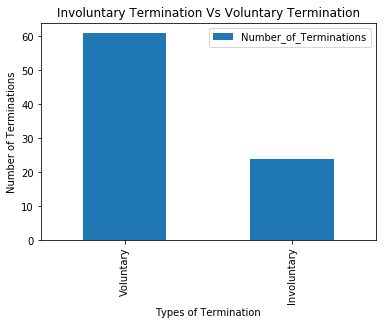

In [63]:
#set title and labels
termination_pd.plot(kind="bar",label="Types_of_Termination")
plt.title("Involuntary Termination Vs Voluntary Termination")
plt.xlabel("Types of Termination")
plt.ylabel("Number of Terminations")
plt.show()

In [67]:
#plt.bar(ind,y_axis)
#Create list of values 
involtypesoftermination = {"Types_of_Involuntary_Termination":["Policy Violation","Attendance Violation", "Job Performance"], "Number_of_Terminations":[6,12,6]}
involtermination_pd = pd.DataFrame(involtypesoftermination)
involtermination_pd
involtermination_pd.set_index("Types_of_Involuntary_Termination",inplace=True)
involtermination_pd.set_index

#plt.xticks(ind,x_axis)

<bound method DataFrame.set_index of                                   Number_of_Terminations
Types_of_Involuntary_Termination                        
Policy Violation                                       6
Attendance Violation                                  12
Job Performance                                        6>

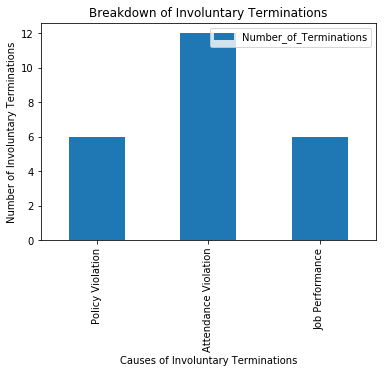

In [69]:
involtermination_pd.plot(kind="bar",label="Types_of_Termination")
plt.title("Breakdown of Involuntary Terminations")
plt.xlabel("Causes of Involuntary Terminations")
plt.ylabel("Number of Involuntary Terminations")
plt.show()

In [71]:
voltypesoftermination = {"Types_of_Voluntary_Termination":["Other Opportunity","Relocation", "Unknown"], "Number_of_Terminations":[40,19,2]}
voltermination_pd = pd.DataFrame(voltypesoftermination)
voltermination_pd
voltermination_pd.set_index("Types_of_Voluntary_Termination",inplace=True)
voltermination_pd.set_index

<bound method DataFrame.set_index of                                 Number_of_Terminations
Types_of_Voluntary_Termination                        
Other Opportunity                                   40
Relocation                                          19
Unknown                                              2>

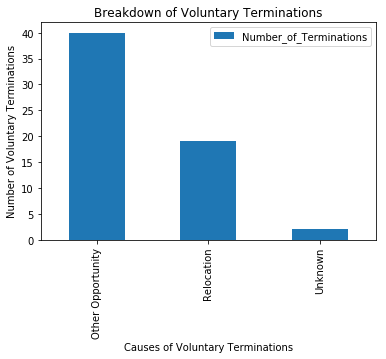

In [72]:
voltermination_pd.plot(kind="bar",label="Types_of_Termination")
plt.title("Breakdown of Voluntary Terminations")
plt.xlabel("Causes of Voluntary Terminations")
plt.ylabel("Number of Voluntary Terminations")
plt.show()

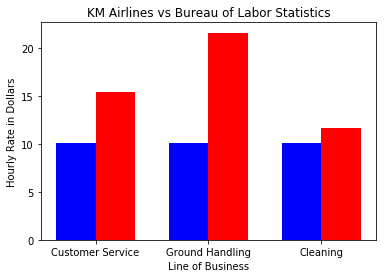

In [87]:
n_groups=3
KM = (10.1, 10.1, 10.1)
BLS = (15.45, 21.6, 11.66)

fig,ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 1
rects1 = plt.bar(index, KM, bar_width,
                 alpha=opacity,
                 color='b',
                 label='KM')

rects2 = plt.bar(index + bar_width, BLS, bar_width,
                 alpha=opacity,
                 color='r',
                 label='BLS')

plt.xlabel('Line of Business')
plt.ylabel('Hourly Rate in Dollars')
plt.title('KM Airlines vs Bureau of Labor Statistics')
plt.xticks(index + bar_width / 2, ('Customer Service', 'Ground Handling', 'Cleaning'))
plt.show()

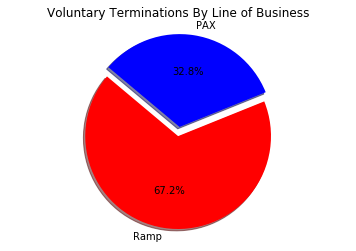

In [89]:
labels = ["Ramp", "PAX"]
sizes = [41, 20]
colors = ["red", "blue"]
explode = (0.1, 0,)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140) 
plt.axis("equal")
plt.title("Voluntary Terminations By Line of Business")
plt.show()


In [90]:
employeepaidutilization = {"Line_Of_Business":["PAX","RAMP", "Cleaning"], "YTD Overtime Hours":[41,521,44]}
employeepaidutilization_pd = pd.DataFrame(employeepaidutilization)
employeepaidutilization_pd
employeepaidutilization_pd.set_index("Line_Of_Business",inplace=True)
employeepaidutilization_pd.set_index

<bound method DataFrame.set_index of                   YTD Overtime Hours
Line_Of_Business                    
PAX                               41
RAMP                             521
Cleaning                          44>

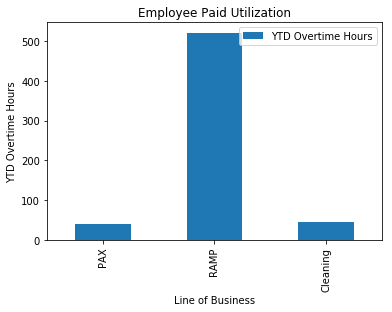

In [91]:
employeepaidutilization_pd.plot(kind="bar",label="Line_Of_Business")
plt.title("Employee Paid Utilization")
plt.xlabel("Line of Business")
plt.ylabel("YTD Overtime Hours")
plt.show()